# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Syamilah Hanifah Yusro
- **Email:** m283d4kx2945@bangkit.academy
- **ID Dicoding:** syamilahhy

## Menentukan Pertanyaan Bisnis

- Bagaimana hari dapat memengaruhi penggunaan sistem penyewaan sepeda? Adakah perbedaan rata-rata peminat antara workday dan holiday?
- Bagaimana kondisi cuaca harian mempengaruhi tingkat peminjaman sepeda? Apakah hari hujan atau cuaca lain berdampak pada rata-rata peminat?

## Import Semua Packages/Library yang Digunakan

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [160]:
#Memuat data day.csv

bike_day = pd.read_csv("day.csv", delimiter=",")
bike_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [161]:
#Memuat data hour.csv

bike_hr = pd.read_csv("hour.csv", delimiter=",")
bike_hr.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [162]:
#menilai data bike_day
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


pada kolom dteday harusnya berupa tipedata date time tetapi object maka harus disesuaikan

selanjutnya, mengecek duplikasi

In [163]:
print("Jumlah duplikasi: ", bike_day.duplicated().sum())

Jumlah duplikasi:  0


tidak derdapat duplikasi

selanjutnya, mengecek missing value

In [164]:
bike_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak terdapat missing value

In [165]:
#menilai data bike_hr
bike_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


pada kolom dteday harusnya berupa tipedata date time tetapi object maka harus disesuaikan

selanjutnya mengecek duplikasi

In [166]:
print("Jumlah duplikasi: ", bike_hr.duplicated().sum())

Jumlah duplikasi:  0


tidak terdapat duplikasi

selanjutnya, mengecek missing value

In [167]:
bike_hr.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak terdapat missing value

dapat disimpulkan bahwa, kesalahan yang terjadi hanya pada tipe data saja yang selanjutnya akan diproses pada tahap cleaning data

### Cleaning Data

Mengubah tipe data object menjadi datetime

In [168]:
if 'dteday' in bike_day.columns:
    bike_day['dteday'] = pd.to_datetime(bike_day['dteday'])

if 'dteday' in bike_hr.columns:
    bike_hr['dteday'] = pd.to_datetime(bike_hr['dteday'])


Cek kembali data apakah sudah sesuai

In [169]:
bike_day.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [170]:
bike_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore all data (bike_df)

In [151]:
bike_df = bike_hr.merge(bike_day, on='dteday', how='inner', suffixes=('_hr', '_day'))
bike_df.head()

,instant_hr,dteday,season_hr,yr_hr,mnth_hr,hr,holiday_hr,weekday_hr,workingday_hr,weathersit_hr,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


Menambahkan keterangan untuk kondisi cuaca

In [152]:
weather_condition = {
    1 : 'Cerah',
    2 : 'Berawan',
    3 : 'Hujan Ringan',
    4 : 'Hujan Lebat',
}

bike_df['weather_conditions'] = bike_df['weathersit_day'].map(weather)

Melihat rangkuman parameter statistik

In [153]:
bike_df.describe(include='all')

<ipython-input-153-9adbcad97987>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  bike_df.describe(include='all')


,instant_hr,dteday,season_hr,yr_hr,mnth_hr,hr,holiday_hr,weekday_hr,workingday_hr,weathersit_hr,...,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,weather_conditions
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cerah
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11040
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,...,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963,NaN
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,...,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947,NaN
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000,NaN


Mengelompokkan rata-rata total penyewa berdasarkan kondisi cuaca

In [154]:
bike_df.groupby('weather_conditions')['cnt_day'].mean().reset_index().sort_values("cnt_day")

,weather_conditions,cnt_day
2,Hujan Ringan,1914.700855
0,Berawan,4062.717595
1,Cerah,4895.177083


Mengelompokkan rata-rata total penyewa berdasarkan hari libur

In [155]:
bike_df.groupby('holiday_day')['cnt_day'].mean().reset_index().sort_values(by="cnt_day")


,holiday_day,cnt_day
1,1,3750.060000
0,0,4556.906215


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana hari dapat memengaruhi penggunaan sistem penyewaan sepeda? Adakah perbedaan rata-rata peminat antara workday dan holiday?

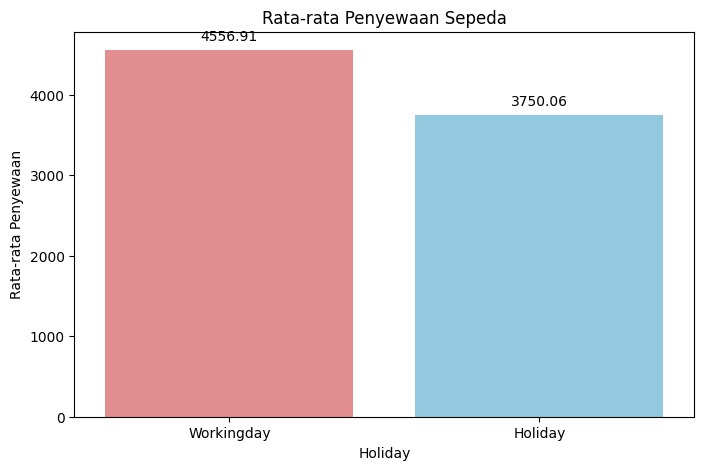

In [156]:
avg_holiday = bike_df.groupby('holiday_day')['cnt_day'].mean().reset_index().sort_values("cnt_day")

fig, ax = plt.subplots(figsize=(8, 5))

sns.barplot(x='holiday_day', y='cnt_day', hue='holiday_day', data=avg_holiday, palette=['skyblue' if x == 0 else 'lightcoral' for x in avg_holiday['holiday_day']], ax=ax, legend=False)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax.set_title('Rata-rata Penyewaan Sepeda')
ax.set_xlabel('Holiday')
ax.set_ylabel('Rata-rata Penyewaan')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Workingday', 'Holiday'])

plt.show()


### Pertanyaan 2: Bagaimana kondisi cuaca harian mempengaruhi tingkat peminjaman sepeda? Apakah hari hujan atau cuaca lain berdampak pada minat masyarakat?


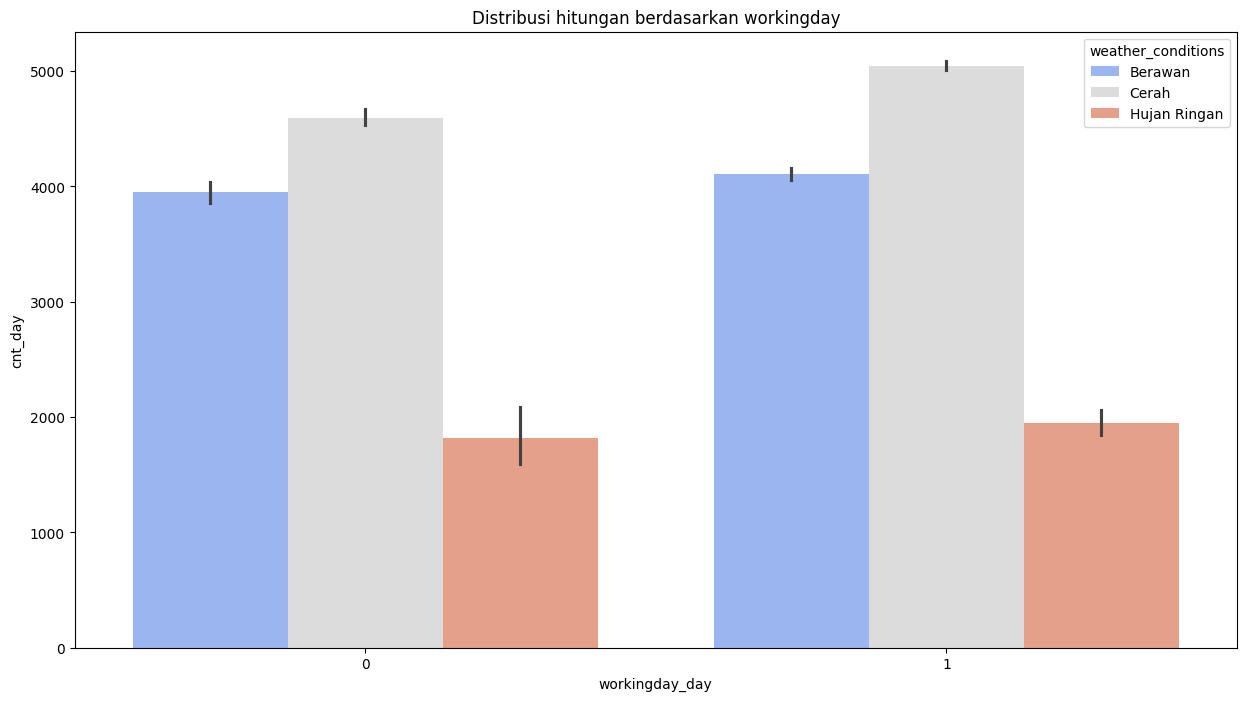

In [157]:
fig,ax=plt.subplots(figsize=(15,8))
#Bar plot for workingday distribution of counts
sns.barplot(data=bike_df, x='workingday_day', y='cnt_day', hue='weather_conditions', palette='coolwarm')

ax.set_title('Distribusi hitungan berdasarkan workingday')
plt.show()

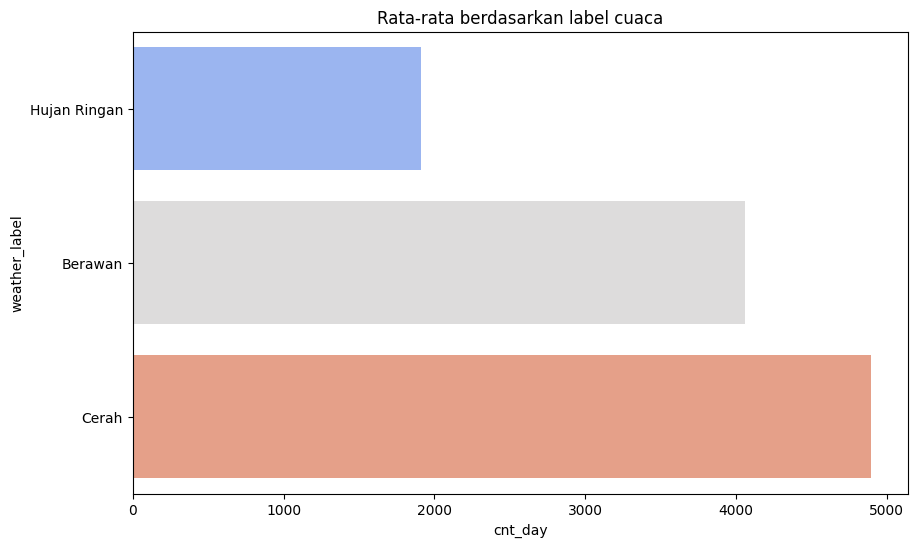

In [158]:
fig, ax = plt.subplots(figsize=(10, 6))

# Assign 'weather_label' to hue and set legend to False
sns.barplot(x='cnt_day', y='weather_label', hue='weather_label', data=avg_weather, palette='coolwarm', legend=False)

ax.set_title('Rata-rata berdasarkan label cuaca')
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Hasil analisis menunjukkan bahwa rata-rata penyewaan mencapai puncaknya saat hari kerja (workday) dibandingkan dengan hari-hari lainnya dalam seminggu. Fenomena ini dapat diartikan bahwa lebih banyak orang cenderung menggunakan layanan penyewaan sepeda pada hari-hari kerja daripada pada akhir pekan atau hari libur.

  Hal ini mungkin disebabkan oleh sejumlah faktor, seperti mobilitas penduduk yang lebih tinggi selama hari kerja untuk keperluan pekerjaan atau aktivitas harian lainnya. Selain itu, kemungkinan adanya perjalanan pendek atau penggunaan sepeda sebagai sarana transportasi harian dapat memberikan kontribusi terhadap tingginya rata-rata penyewaan pada hari kerja.


- Conclution pertanyaan 2 : Kondisi cuaca mempengaruhi minat penyewa sepeda. Ditemukan bahwa pada hari-hari dengan cuaca cerah, tingkat rata-rata penyewaan cenderung lebih tinggi dibandingkan dengan kondisi cuaca lainnya. Temuan ini mencerminkan kecenderungan masyarakat untuk lebih tertarik menggunakan layanan penyewaan sepeda ketika cuaca mendukung, mungkin karena kondisi cuaca yang cerah memberikan pengalaman berkendara yang lebih menyenangkan dan aman.

In [159]:
bike_df.to_csv("all_data.csv", index=False)